In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Define file paths
file_paths = [
    "train-1.csv",
    "train-2.csv",
    "train-3.csv",
    "train-4.csv",
    "train-5.csv",
    "train-6.csv",
    "train-7.csv",
    "train-8.csv",
]

# Load CSV files into Pandas DataFrames
dfs = [pd.read_csv("../data/" + file_path, index_col=0) for file_path in file_paths]

# Combine all data into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Convert non-numeric placeholders to NaN
combined_df.replace("\\N", np.nan, inplace=True)

In [63]:
# Display dataset shape
print(f"Dataset contains {combined_df.shape[0]} rows and {combined_df.shape[1]} columns.")

Dataset contains 7959 rows and 8 columns.


In [64]:
# Display missing values count
missing_values = combined_df.isnull().sum()
print("\nMissing Values Count:")
print(missing_values[missing_values > 0])


Missing Values Count:
originalTitle     3988
startYear          786
endYear           7173
runtimeMinutes      13
numVotes           790
dtype: int64


In [65]:
# Summary statistics
summary_stats = combined_df.describe(include="all")
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
           tconst  primaryTitle originalTitle startYear endYear  \
count        7959          7959          3971      7173     786   
unique       7959          7846          3944       104      92   
top     tt0010600  Little Women          Prey      2019    2018   
freq            1             4             3       299      47   
mean          NaN           NaN           NaN       NaN     NaN   
std           NaN           NaN           NaN       NaN     NaN   
min           NaN           NaN           NaN       NaN     NaN   
25%           NaN           NaN           NaN       NaN     NaN   
50%           NaN           NaN           NaN       NaN     NaN   
75%           NaN           NaN           NaN       NaN     NaN   
max           NaN           NaN           NaN       NaN     NaN   

       runtimeMinutes      numVotes label  
count            7946  7.169000e+03  7959  
unique            299           NaN     2  
top                90           NaN  True 

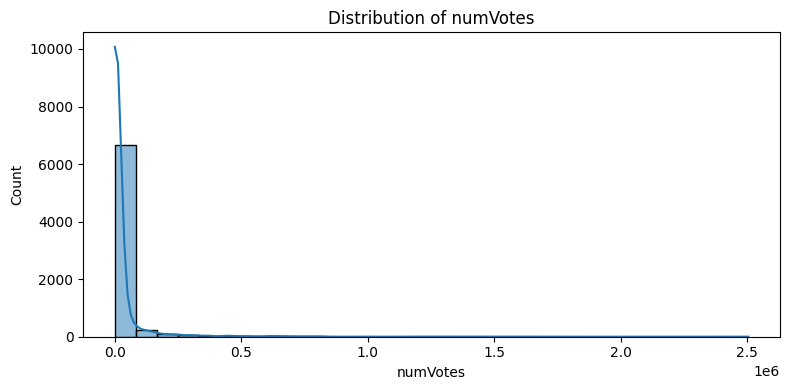

In [66]:
numeric_cols = combined_df.select_dtypes(include=[np.number]).columns.tolist()

# Create subplots
fig, axes = plt.subplots(nrows=len(numeric_cols), figsize=(8, len(numeric_cols) * 4))

# Ensure axes is iterable (even if there's only one subplot)
if len(numeric_cols) == 1:
    axes = [axes]  # Wrap single Axes object in a list

# Plot histograms for numeric columns
for ax, col in zip(axes, numeric_cols):
    sns.histplot(combined_df[col].dropna(), bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

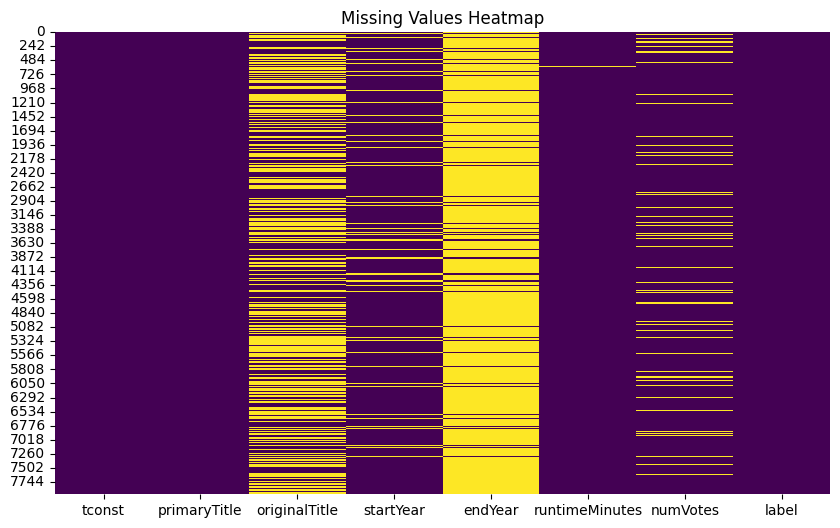

In [67]:
# Plot missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(combined_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

C:\Users\EduardCP\AppData\Local\Temp\ipykernel_10128\1805444984.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = combined_df.corr()


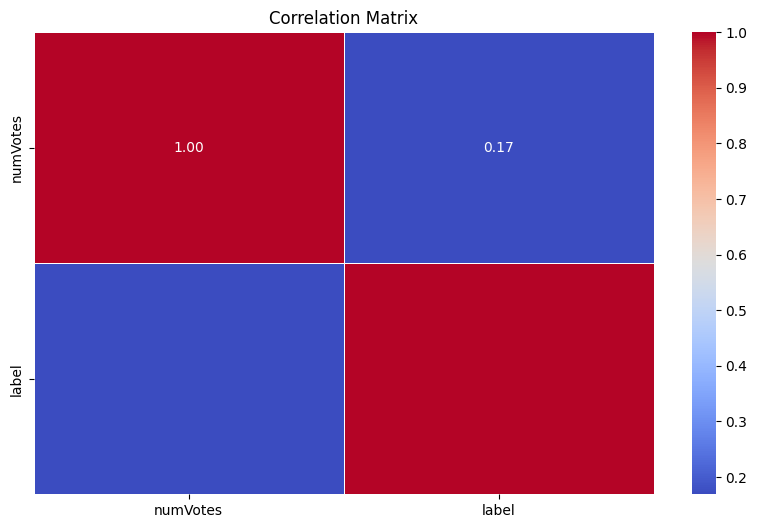

In [68]:
plt.figure(figsize=(10, 6))

# Compute correlation matrix (NaNs are ignored by default)
corr_matrix = combined_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix")
plt.show()

In [69]:
df = pd.concat(dfs, ignore_index=True)

df.replace("\\N", np.nan, inplace=True)

missing_values = df.isnull().sum()
missing_cols = missing_values[missing_values > 0]

non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

special_character_cols = ["primaryTitle", "originalTitle"]

skewness_info = df[numeric_cols].skew().to_dict()

print("## 1. Missing Values:")
for col, count in missing_cols.items():
    print(f"- {col} has {count}** missing values.")

## 1. Missing Values:
- originalTitle has 3988** missing values.
- startYear has 786** missing values.
- endYear has 7173** missing values.
- runtimeMinutes has 13** missing values.
- numVotes has 790** missing values.


In [70]:
print("\n## 2. Inconsistent Data Types:")
for col in non_numeric_cols:
    if col in ["startYear", "endYear", "runtimeMinutes"]:
        print(f"- {col} is stored as `object` but should be converted to a numeric format.")



## 2. Inconsistent Data Types:
- startYear is stored as `object` but should be converted to a numeric format.
- endYear is stored as `object` but should be converted to a numeric format.
- runtimeMinutes is stored as `object` but should be converted to a numeric format.


In [ ]:
for col in special_character_cols:
    print(f"- {col} may contain non-English characters (accents, special symbols).")
print("- endYear column contains `\\N`, which should be replaced with `NaN` or a default value.")
